In [139]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# ***Data Analysis***

In [140]:
## Read the csv file in a panda dataframe
data=pd.read_csv('training_set.csv', index_col=0)
data2=data

In [141]:
## Check if there is any categorical data types
data2.dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
X24    float64
X25    float64
X26    float64
X27    float64
X28    float64
X29    float64
X30    float64
X31    float64
X32    float64
X33    float64
X34    float64
X35    float64
X36    float64
X37    float64
X38    float64
X39    float64
X40    float64
X41    float64
X42    float64
X43    float64
X44    float64
X45    float64
X46    float64
X47    float64
X48    float64
X49    float64
X50    float64
X51    float64
X52    float64
X53    float64
X54    float64
X55    float64
X56      int64
X57      int64
Y        int64
dtype: object

In [142]:
## Check if the dataset is balanced or not 
print('Number of samples in each class:\n',data2['Y'].value_counts())

Number of samples in each class:
 0    2376
1    1534
Name: Y, dtype: int64


In [143]:
## Check if there is any null value
data2.isnull().any()

X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
X24    False
X25    False
X26    False
X27    False
X28    False
X29    False
X30    False
X31    False
X32    False
X33    False
X34    False
X35    False
X36    False
X37    False
X38    False
X39    False
X40    False
X41    False
X42    False
X43    False
X44    False
X45    False
X46    False
X47    False
X48    False
X49    False
X50    False
X51    False
X52    False
X53    False
X54    False
X55    False
X56    False
X57    False
Y      False
dtype: bool

In [144]:
## Statistical Summary of the dataset
data2.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079,0.392327
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858,0.488331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000,0.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.00000

Histogram of variable X1:


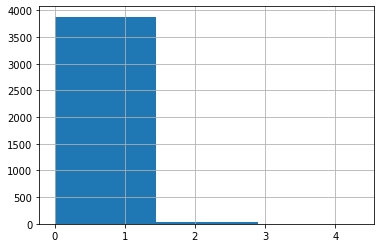

Histogram of variable X2:


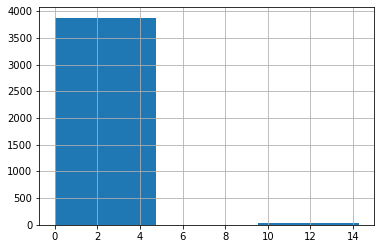

Histogram of variable X3:


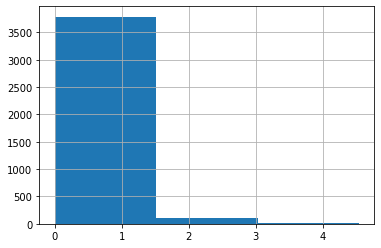

Histogram of variable X4:


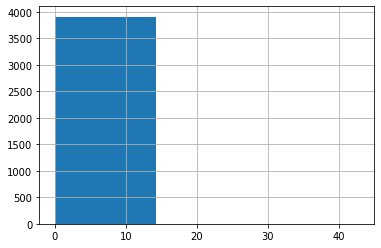

Histogram of variable X5:


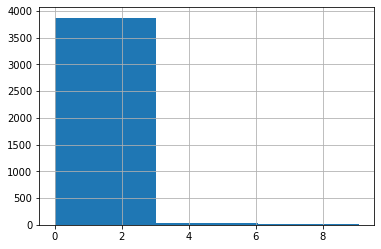

Histogram of variable X6:


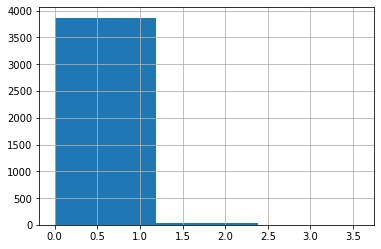

Histogram of variable X7:


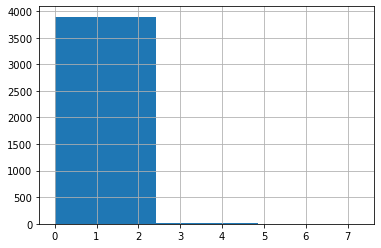

Histogram of variable X8:


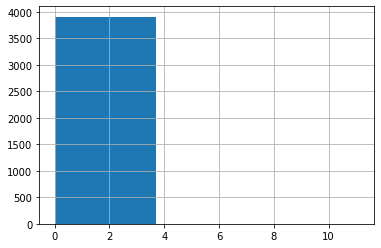

Histogram of variable X9:


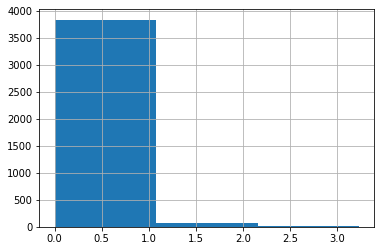

Histogram of variable X10:


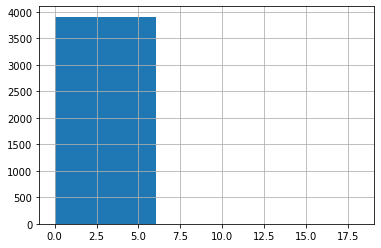

Histogram of variable X11:


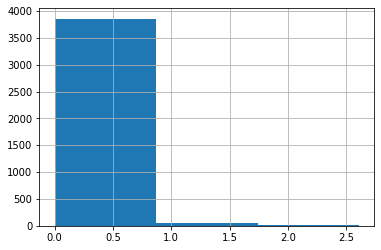

Histogram of variable X12:


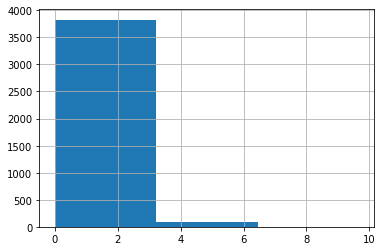

Histogram of variable X13:


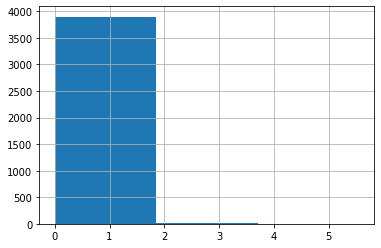

Histogram of variable X14:


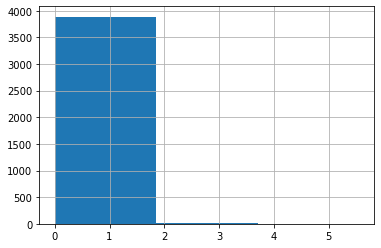

Histogram of variable X15:


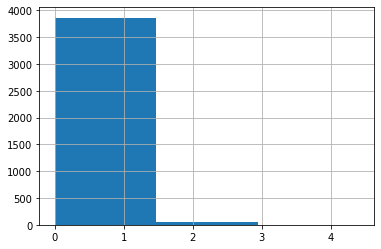

Histogram of variable X16:


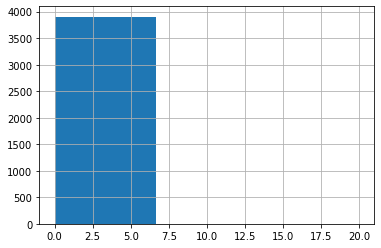

Histogram of variable X17:


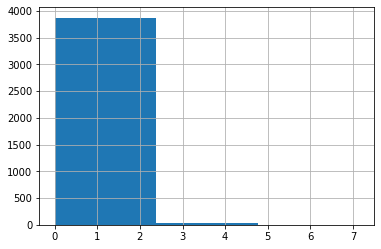

Histogram of variable X18:


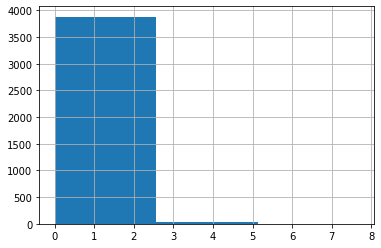

Histogram of variable X19:


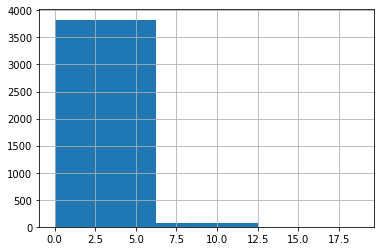

Histogram of variable X20:


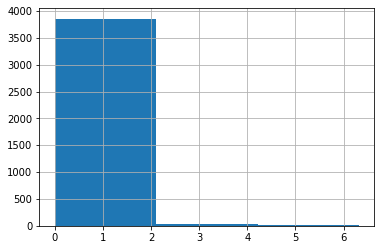

Histogram of variable X21:


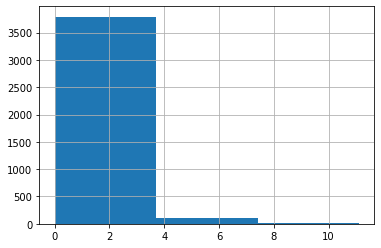

Histogram of variable X22:


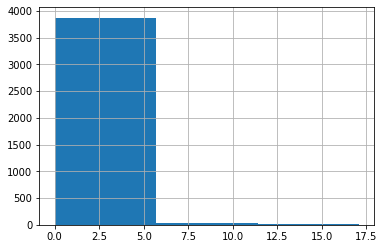

Histogram of variable X23:


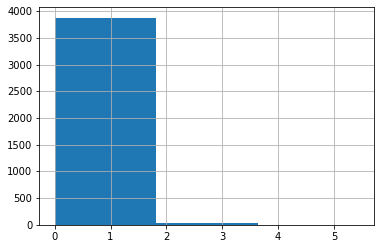

Histogram of variable X24:


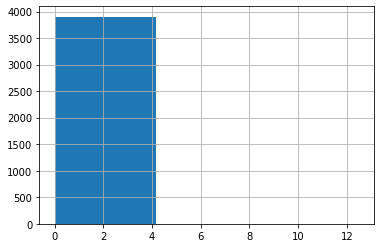

Histogram of variable X25:


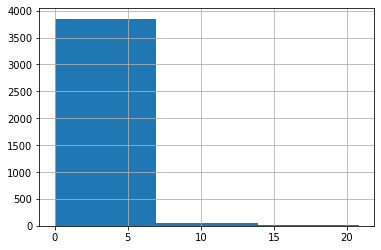

Histogram of variable X26:


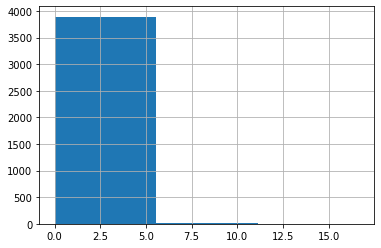

Histogram of variable X27:


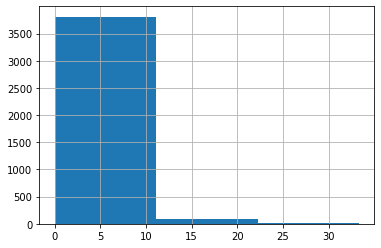

Histogram of variable X28:


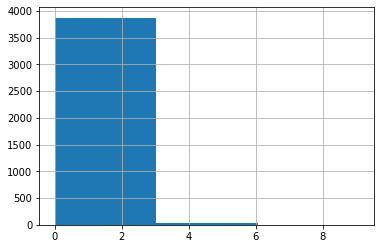

Histogram of variable X29:


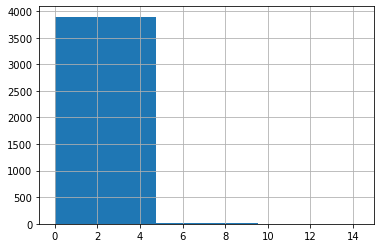

Histogram of variable X30:


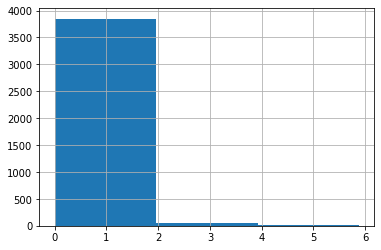

Histogram of variable X31:


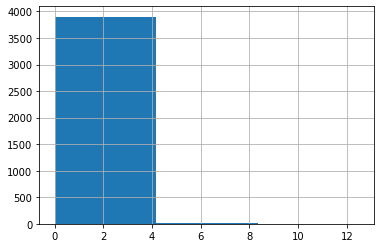

Histogram of variable X32:


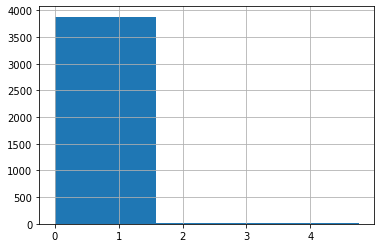

Histogram of variable X33:


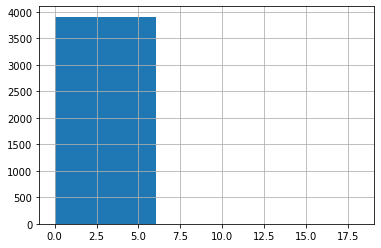

Histogram of variable X34:


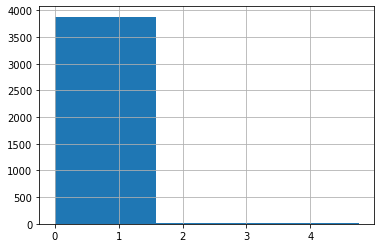

Histogram of variable X35:


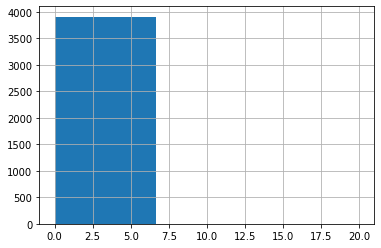

Histogram of variable X36:


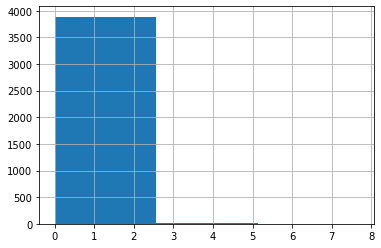

Histogram of variable X37:


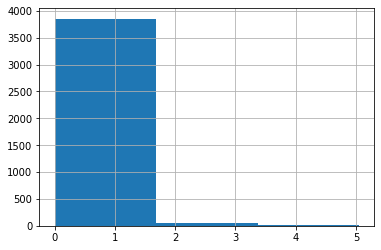

Histogram of variable X38:


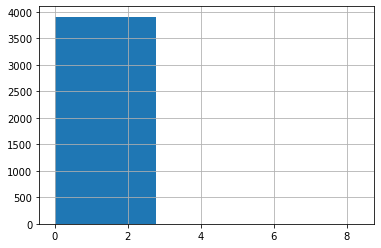

Histogram of variable X39:


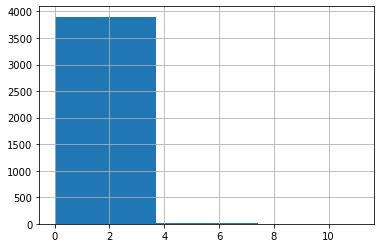

Histogram of variable X40:


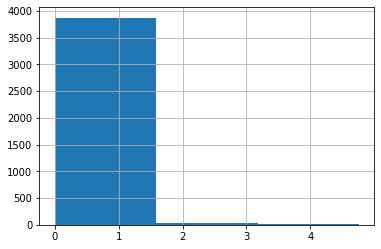

Histogram of variable X41:


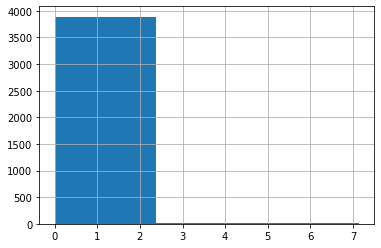

Histogram of variable X42:


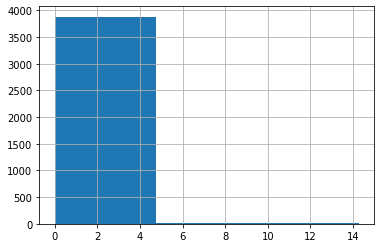

Histogram of variable X43:


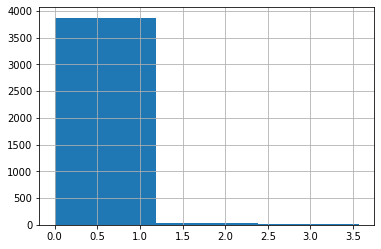

Histogram of variable X44:


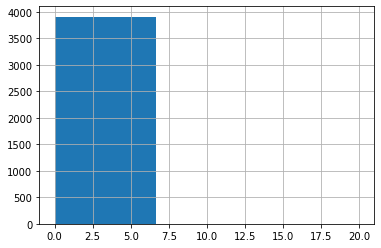

Histogram of variable X45:


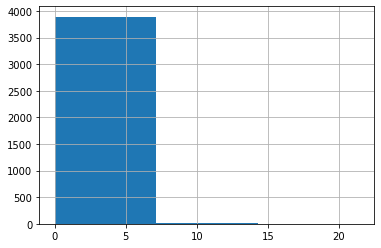

Histogram of variable X46:


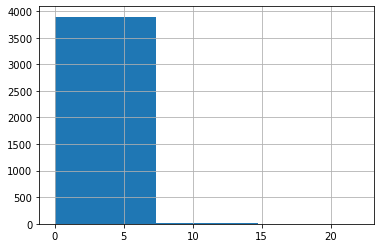

Histogram of variable X47:


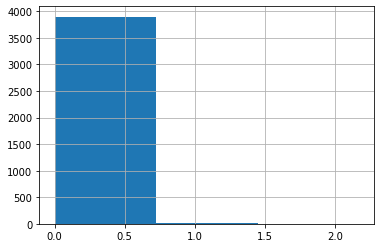

Histogram of variable X48:


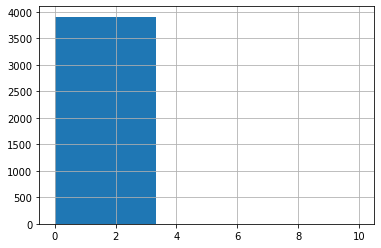

Histogram of variable X49:


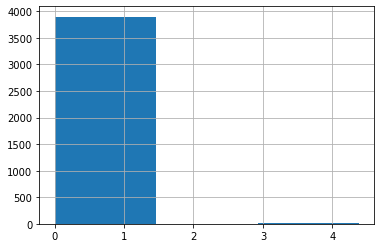

Histogram of variable X50:


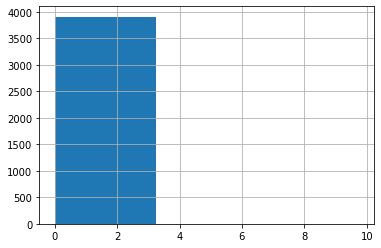

Histogram of variable X51:


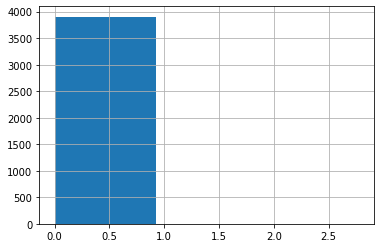

Histogram of variable X52:


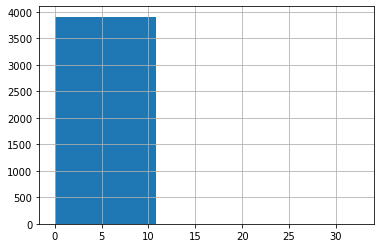

Histogram of variable X53:


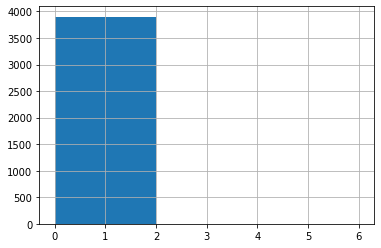

Histogram of variable X54:


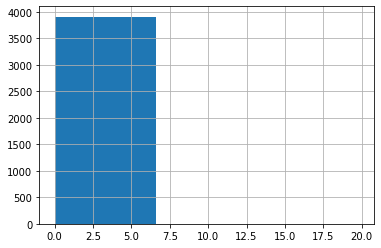

Histogram of variable X55:


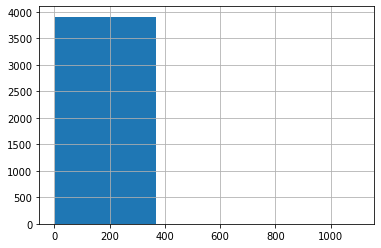

Histogram of variable X56:


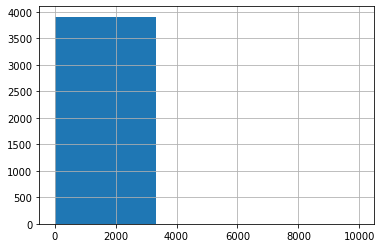

Histogram of variable X57:


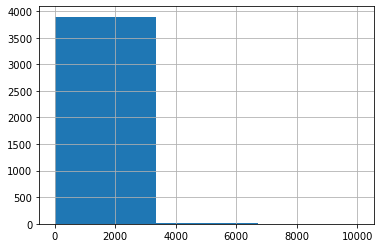

Histogram of variable Y:


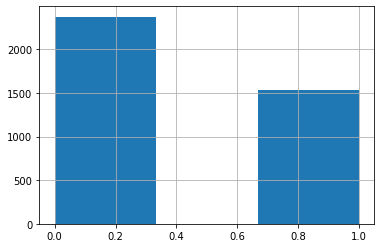

In [145]:
## Plot histogram of each variable 
column_name=data2.columns
for name in column_name:
  print('Histogram of variable '+ name +':')
  data2[name].hist(bins=3)
  plt.show()

In [146]:
## Plot correlation among the variabes to check the presence of highly correlated variable
corr = data2.corr()
print(corr)

           X1        X2        X3  ...       X56       X57         Y
X1   1.000000 -0.026677  0.078010  ...  0.056025  0.101600  0.129805
X2  -0.026677  1.000000 -0.030758  ...  0.001448 -0.021016 -0.026476
X3   0.078010 -0.030758  1.000000  ...  0.091124  0.067387  0.204965
X4   0.007472 -0.006455 -0.018648  ...  0.020733  0.021542  0.055609
X5   0.025377 -0.020289  0.065148  ...  0.045998  0.004402  0.242400
X6   0.060360 -0.023827  0.093120  ...  0.083647  0.086964  0.253613
X7   0.004934  0.006748  0.037979  ...  0.053253 -0.008160  0.327233
X8   0.002262 -0.014461  0.018314  ...  0.037654  0.046959  0.217332
X9   0.128300  0.000199  0.098008  ...  0.181932  0.276767  0.254297
X10  0.038547  0.035494  0.029760  ...  0.097029  0.092385  0.138245
X11  0.171678 -0.005176  0.050709  ...  0.082787  0.118883  0.247640
X12  0.104751 -0.037223  0.077474  ...  0.018993  0.020424  0.008187
X13  0.067566 -0.015872  0.053994  ...  0.040076  0.112609  0.125464
X14  0.048698 -0.007229  0.002396 

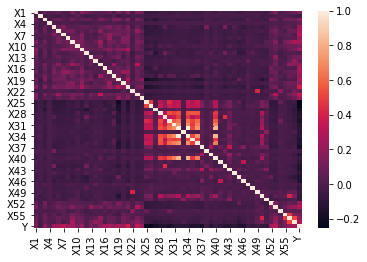

In [147]:
## Plot the correlation values
sns.heatmap(corr)

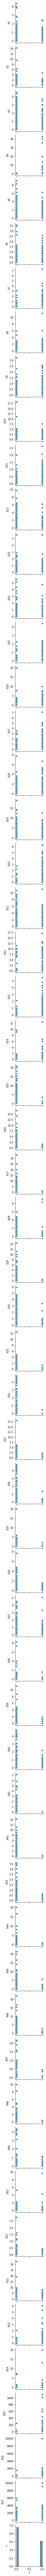

In [148]:
## Plot each variable with respect to the target variable
sns.pairplot(data2,y_vars=[name for name in column_name],x_vars=["Y"])  

# ***Model Selection***

In [149]:
data=pd.read_csv('training_set.csv', index_col=0)
data1=data
val=data1.values

l = len(val)
train_len = int((l/5)*4)

train_X = val[:,0:57]
train_y = val[:,57]

scaler = MinMaxScaler(feature_range = (0, 1))
train_X_scaled = scaler.fit_transform(train_X)

LR: 0.892072 (0.017414)
LDA: 0.889003 (0.017690)
NB: 0.812788 (0.020422)
KNN: 0.898210 (0.014322)
CART: 0.917136 (0.015565)
SVM: 0.931969 (0.015607)


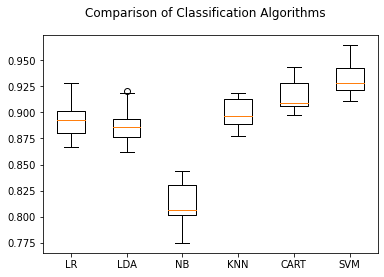

In [150]:
# Defining number of folds
num_folds = 10
num_instances = len(train_X_scaled)
seed = 7

# Preparing models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

# Model Evaluation
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits = num_folds, random_state = seed, shuffle=True)
    training_results = model_selection.cross_val_score(model, train_X_scaled, train_y, cv = kfold, scoring = 'accuracy')
    results.append(training_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, training_results.mean(), training_results.std())
    print(msg)

# Boxplot to compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# ***Data Preparation and Classification***

In [151]:
data=pd.read_csv('training_set.csv', index_col=0)
data1=data
val=data1.values

l = len(val)
train_len = int((l/5)*4)

train_X = val[0:train_len,0:57]
train_y = val[0:train_len,57]
test_X = val[train_len:,0:57]
test_y = val[train_len:,57]

In [152]:
scaler = MinMaxScaler(feature_range = (0, 1))
train_X_scaled = scaler.fit_transform(train_X)
test_X_scaled = scaler.fit_transform(test_X)

In [153]:
model = SVC()
#model = LogisticRegression(penalty='l1', solver='liblinear') 

# Training model and checking the score
model.fit(train_X_scaled, train_y)

#importance = model.coef_
model.score(train_X_scaled, train_y)
pred_y = model.predict(test_X_scaled)

In [154]:
## Training Accuracy
acc_log_train = round(model.score(train_X_scaled, train_y) * 100, 2)
print('Training Accuracy:', acc_log_train)

Training Accuracy: 95.2


In [155]:
## Testing Accuracy
acc_log_test = round(model.score(test_X_scaled, test_y) * 100, 2)
print('Training Accuracy:', acc_log_test)

Training Accuracy: 88.75


In [156]:
## Create confusion matrix of the model's performance
confusion_matrix = confusion_matrix(test_y, pred_y)
print(confusion_matrix)

[[433  32]
 [ 56 261]]


In [157]:
## Create classification report of the model
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       465
         1.0       0.89      0.82      0.86       317

    accuracy                           0.89       782
   macro avg       0.89      0.88      0.88       782
weighted avg       0.89      0.89      0.89       782



# ***Prediction on Test Data***

In [158]:
## Read the test data
test_data=pd.read_csv('test_set.csv', index_col=0)
print(test_data.head())

     X1   X2    X3   X4    X5    X6  ...    X52    X53    X54     X55  X56   X57
0  0.70  0.0  0.70  0.0  0.00  0.00  ...  0.105  0.000  0.000   2.342   47    89
1  0.00  0.0  0.84  0.0  0.84  0.00  ...  0.776  0.129  0.000  10.375  168   249
2  0.46  0.3  0.46  0.0  0.05  0.12  ...  0.325  0.756  0.153   5.891  193  3040
3  0.10  0.2  1.01  0.0  0.80  0.80  ...  0.490  0.158  0.015   8.550  669  1351
4  0.00  0.0  0.72  0.0  0.72  0.00  ...  0.729  0.121  0.000   7.781   32   249

[5 rows x 57 columns]


In [159]:
## Create an array from the dataframe
test_val=test_data.values

## Standardize the values
scaler = MinMaxScaler(feature_range = (0, 1))
test_val_scaled = scaler.fit_transform(test_val)

In [160]:
## Predict on the test data
test_data_pred = model.predict(test_val_scaled)

In [161]:
## Add a column containing the class prediction of the test data
test_data_with_pred = test_data
test_data_with_pred['Y_prediction'] = test_data_pred

print(test_data_with_pred.head())

     X1   X2    X3   X4    X5  ...    X54     X55  X56   X57  Y_prediction
0  0.70  0.0  0.70  0.0  0.00  ...  0.000   2.342   47    89           0.0
1  0.00  0.0  0.84  0.0  0.84  ...  0.000  10.375  168   249           1.0
2  0.46  0.3  0.46  0.0  0.05  ...  0.153   5.891  193  3040           1.0
3  0.10  0.2  1.01  0.0  0.80  ...  0.015   8.550  669  1351           1.0
4  0.00  0.0  0.72  0.0  0.72  ...  0.000   7.781   32   249           1.0

[5 rows x 58 columns]
